# Tugas Stage 1 

## Kelompok 3 "Statistica Fortis"

### Project Manager      : Fikri Hadyan Kusuma
### Data Engineer        : Muhammad Ihsan
### Data Scientist       : Faris Ramadhan
### Business/Data Analyst: Daan Zhafrullah

# Dataset : HR Analytics Case

# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
employee_survey_data = pd.read_csv(r"C:\Users\ASUS\Documents\Tugas Kelompok Rakamin\Stage 3\[HR] HR Analytics Case Study 2\employee_survey_data.csv")
general_data = pd.read_csv(r"C:\Users\ASUS\Documents\Tugas Kelompok Rakamin\Stage 3\[HR] HR Analytics Case Study 2\general_data.csv")
manager_survey_data = pd.read_csv(r"C:\Users\ASUS\Documents\Tugas Kelompok Rakamin\Stage 3\[HR] HR Analytics Case Study 2\manager_survey_data.csv")
in_time = pd.read_csv(r"C:\Users\ASUS\Documents\Tugas Kelompok Rakamin\Stage 3\[HR] HR Analytics Case Study 2\in_time.csv")
out_time = pd.read_csv(r"C:\Users\ASUS\Documents\Tugas Kelompok Rakamin\Stage 3\[HR] HR Analytics Case Study 2\out_time.csv")

# Data Understanding

In [3]:
employee_survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [4]:
employee_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [5]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [6]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [7]:
manager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [8]:
manager_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


# Membuang Fitur

In [9]:
general_data.drop(columns=['EmployeeCount', 'StandardHours', 'Over18'], inplace=True)

Fitur EmployeeCount, StandardHours, dan Over18 dibuang, karena memiliki data dengan nilai yang sama sehingga tidak berpengaruh signifikan terhadap model.

# Memeriksa Missing Value

In [10]:
employee_survey_data.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [11]:
general_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [12]:
manager_survey_data.isnull().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

Fitur - fitur yang terdapat missing value yaitu : <br>
EnvironmentSatisfaction    25 <br>
JobSatisfaction            20 <br>
WorkLifeBalance            38 <br>
NumCompaniesWorked         19 <br>
TotalWorkingYears           9 <br>

# Visualisasi Fitur - Fitur Yang Memiliki Missing Value

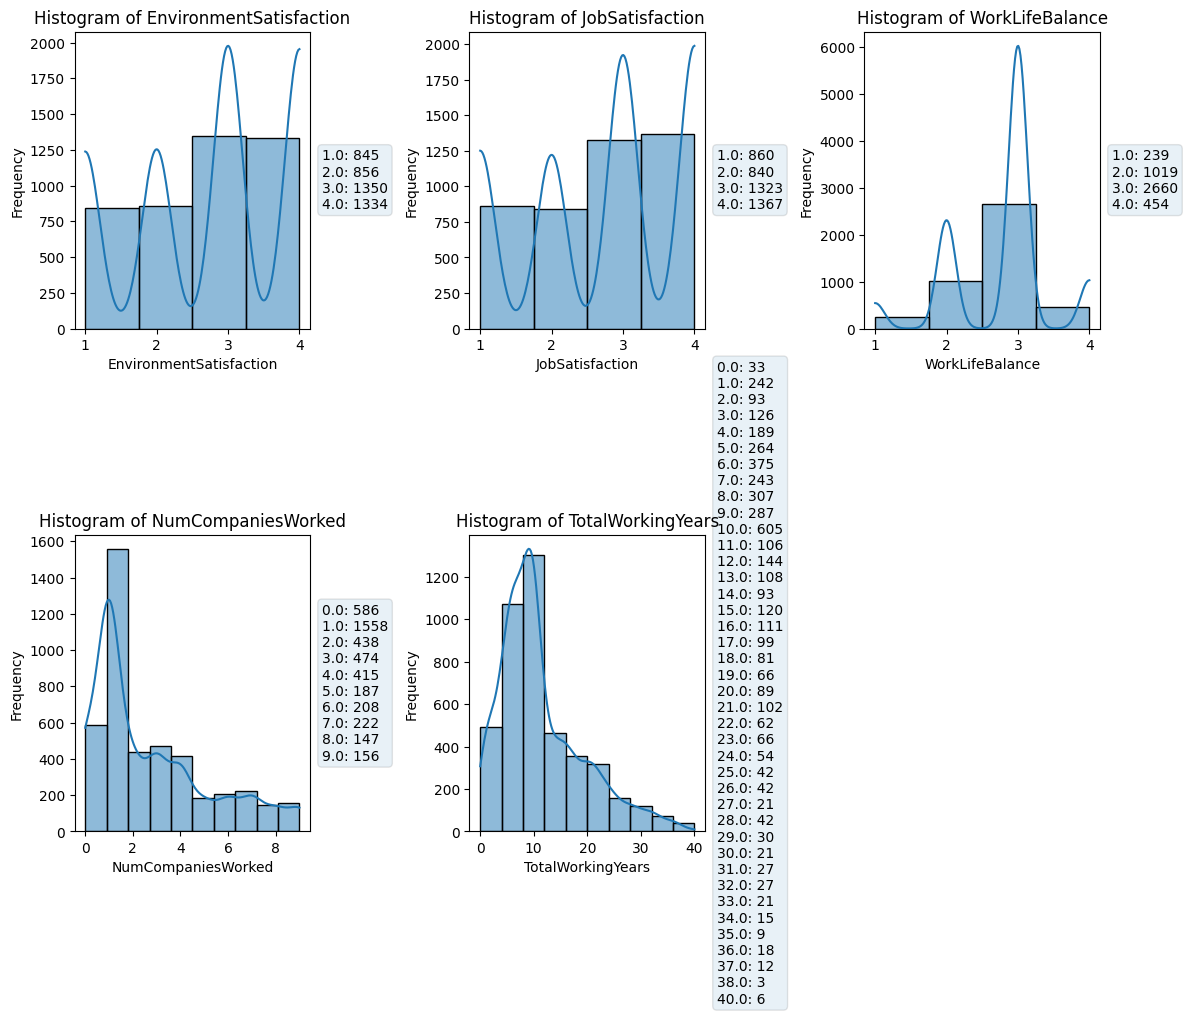

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10))

# First 3 histograms (top row)
features_employee_survey_with_missing_value = ["EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance"]
for i, feature in enumerate(features_employee_survey_with_missing_value):
    sns.histplot(employee_survey_data[feature], ax=axs[0, i], kde=True, binwidth=0.75)
    axs[0, i].set_title(f'Histogram of {feature}')
    axs[0, i].set_xlabel(feature)
    axs[0, i].set_ylabel('Frequency')
    frequency_counts = employee_survey_data[feature].value_counts().sort_index()
    freq_text = "\n".join([f"{val}: {count}" for val, count in frequency_counts.items()])
    axs[0, i].text(1.05, 0.5, freq_text, transform=axs[0, i].transAxes,
                   fontsize=10, verticalalignment='center', bbox=dict(boxstyle='round', alpha=0.1))

# Remaining 2 histograms (bottom row)
features_general_data_with_missing_value = ["NumCompaniesWorked", "TotalWorkingYears"]
for i, feature in enumerate(features_general_data_with_missing_value):
    sns.histplot(general_data[feature], ax=axs[1, i], kde=True, bins=10)
    axs[1, i].set_title(f'Histogram of {feature}')
    axs[1, i].set_xlabel(feature)
    axs[1, i].set_ylabel('Frequency')
    frequency_counts = general_data[feature].value_counts().sort_index()
    freq_text = "\n".join([f"{val}: {count}" for val, count in frequency_counts.items()])
    axs[1, i].text(1.05, 0.5, freq_text, transform=axs[1, i].transAxes,
                   fontsize=10, verticalalignment='center', bbox=dict(boxstyle='round', alpha=0.1))

# Hide the last empty subplot if needed
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Menangani Missing Value

In [14]:
employee_survey_data["EnvironmentSatisfaction"] = employee_survey_data["EnvironmentSatisfaction"].fillna(employee_survey_data['EnvironmentSatisfaction'].mode()[0])
employee_survey_data["JobSatisfaction"] = employee_survey_data["JobSatisfaction"].fillna(employee_survey_data['JobSatisfaction'].mode()[0])
employee_survey_data["WorkLifeBalance"] = employee_survey_data["WorkLifeBalance"].fillna(employee_survey_data['WorkLifeBalance'].mode()[0])
general_data["NumCompaniesWorked"] = general_data["NumCompaniesWorked"].fillna(general_data['NumCompaniesWorked'].median())
general_data["TotalWorkingYears"] = general_data["TotalWorkingYears"].fillna(general_data['TotalWorkingYears'].median())

Missing value pada fitur EnvironmentSatisfaction, JobSatisfaction, dan WorkLifeBalance dapat ditangani dengan mengisi menggunakan nilai modus, karena data bersifat kategorikal. Sedangkan untuk fitur NumCompaniesWorked dan TotalWorkingYears, missing value dapat ditangani dengan mengisi menggunakan nilai median karena berdasarkan visualisasi histogram, distribusi data cenderung tidak normal dan untuk menghindari pengaruh outlier.

# Memeriksa Data Duplikat

In [15]:
employee_survey_data.duplicated().sum()

np.int64(0)

In [16]:
general_data.duplicated().sum()

np.int64(0)

In [17]:
manager_survey_data.duplicated().sum()

np.int64(0)

Dataset tidak memiliki data yang duplikat

# Menggabungkan Ketiga Dataset Menjadi Satu Dataset

In [18]:
merged_data_1 = pd.merge(general_data, employee_survey_data, on='EmployeeID', how='inner')

merged_data = pd.merge(merged_data_1, manager_survey_data, on='EmployeeID', how='inner')

merged_data.to_csv('merged_data.csv', index=False)
print("Dataset berhasil digabungkan dan disimpan sebagai 'merged_data.csv'")

Dataset berhasil digabungkan dan disimpan sebagai 'merged_data.csv'


# Load Merged Data

In [19]:
merged_data = pd.read_csv(r"C:\Users\ASUS\Documents\Tugas Kelompok Rakamin\Stage 3\merged_data.csv")

# Informasi Data

In [20]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4410 non-null   float64
 14  PercentSalaryHike       

# Visualisasi Fitur - Fitur Kategorikal Dengan Diagram Pie

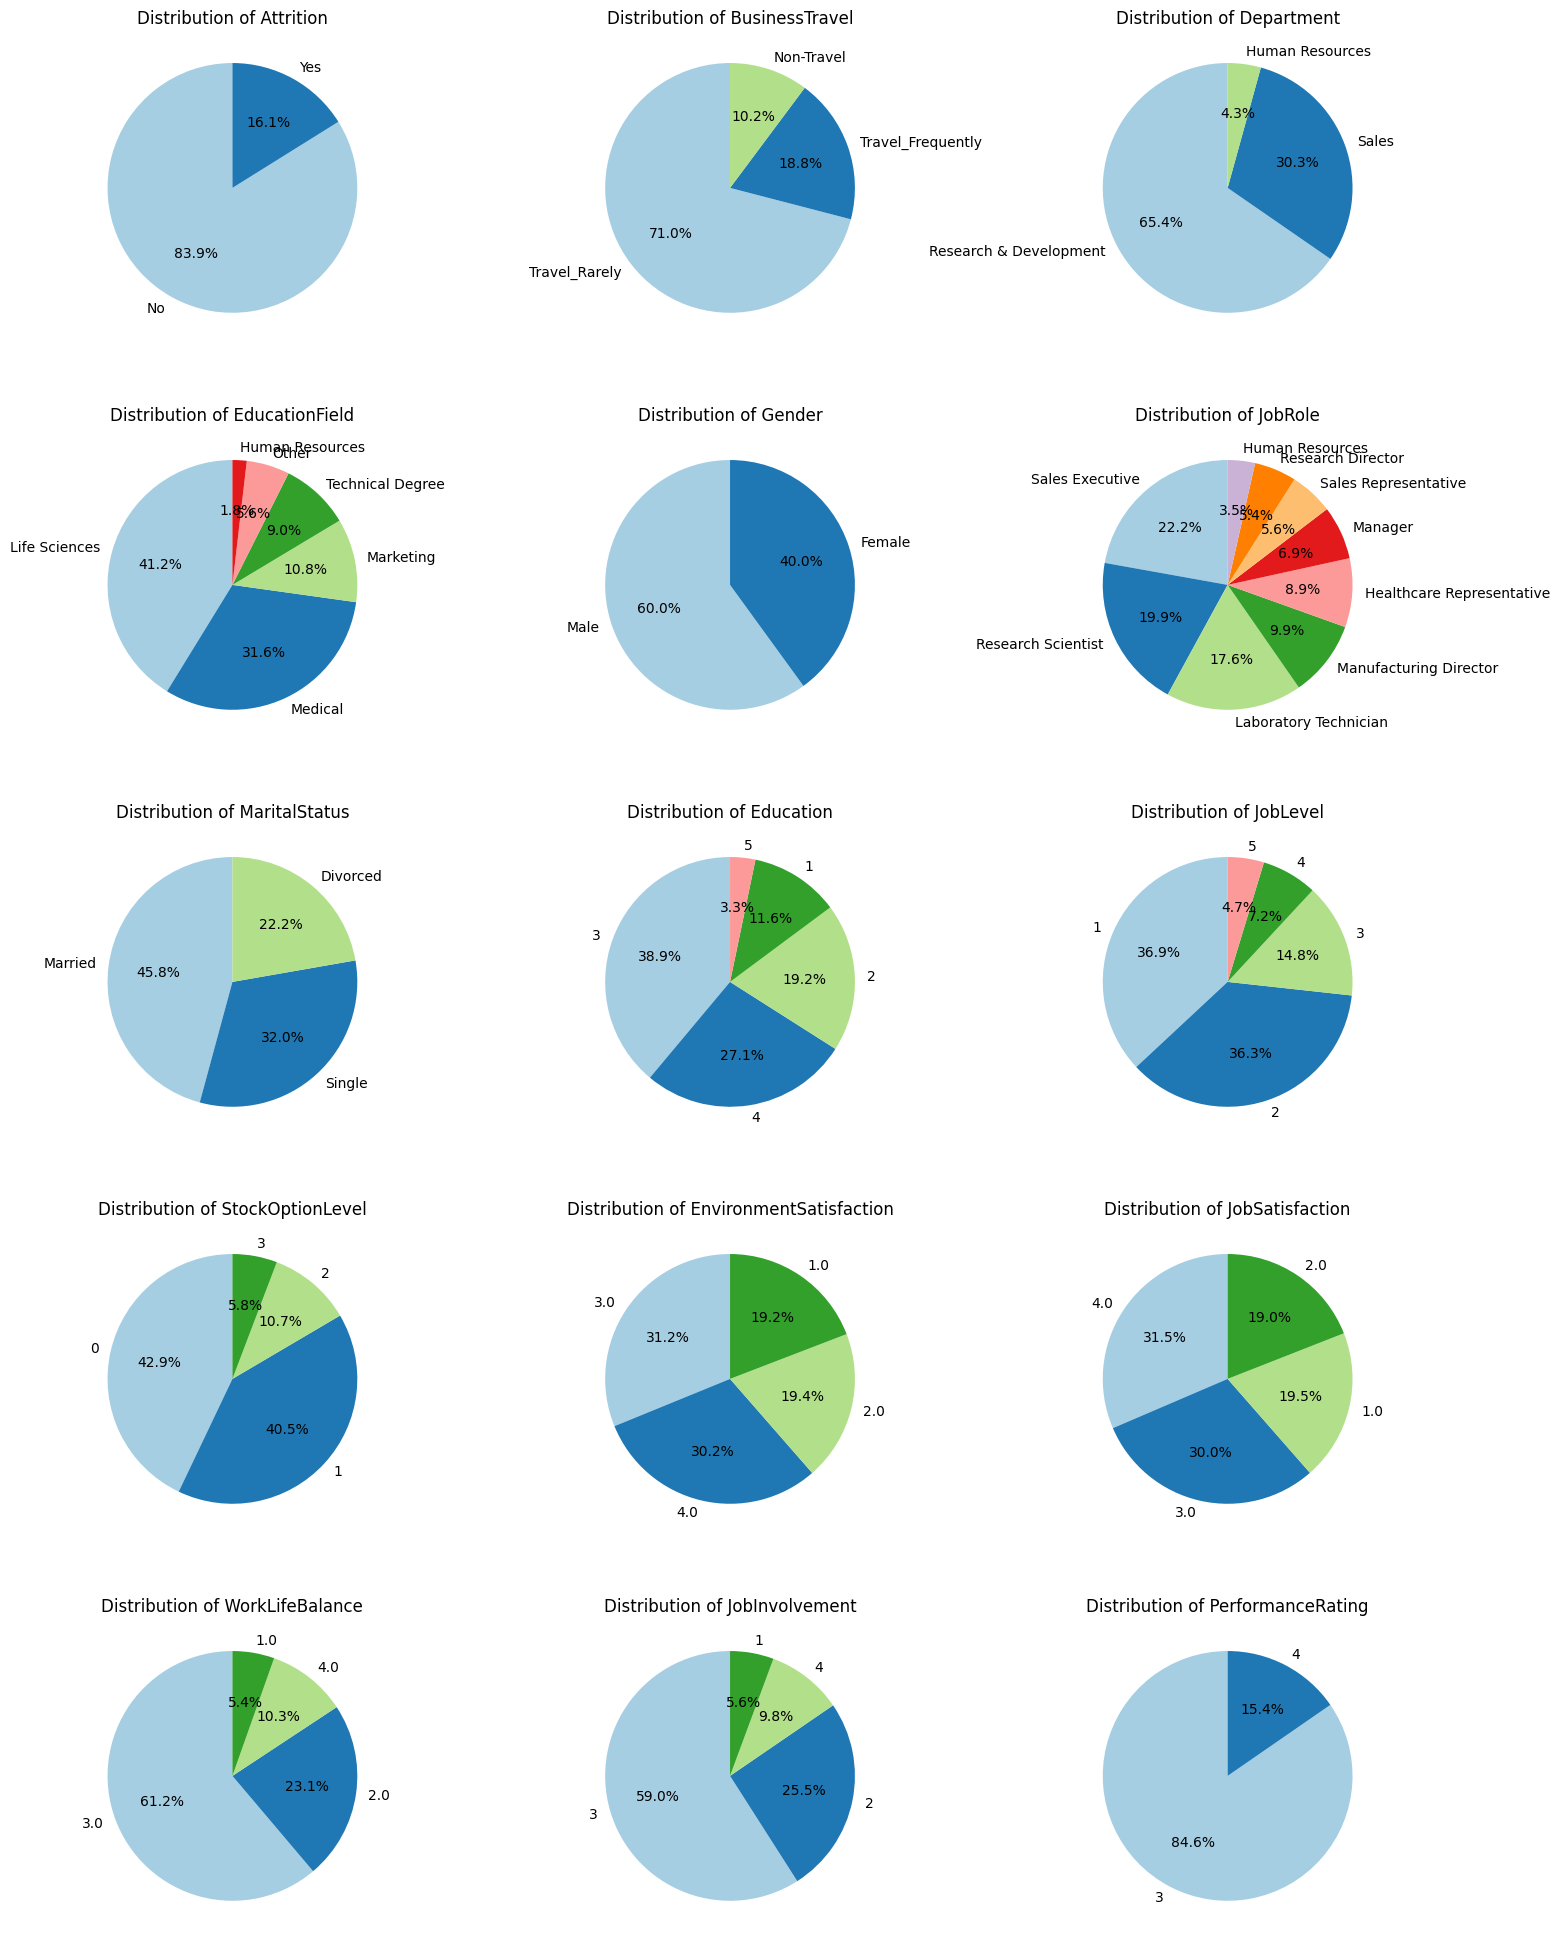

In [21]:
categorical_features = [
    'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 
    'JobRole', 'MaritalStatus', 'Education', 'JobLevel', 'StockOptionLevel', 
    'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating'
]

def plot_pie_charts(data, features):
    # Menentukan jumlah baris dan kolom
    rows, cols = 5, 3
    fig, axes = plt.subplots(rows, cols, figsize=(15, 20))  # Ukuran grid
    
    for i, feature in enumerate(features):
        row, col = divmod(i, cols)  # Menentukan posisi baris dan kolom
        ax = axes[row, col]  # Pilih subplot
        data[feature].value_counts().plot.pie(
            ax=ax, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors
        )
        ax.set_title(f'Distribution of {feature}')
        ax.set_ylabel('')  # Hilangkan label default
        
    # Hapus subplot kosong jika fitur kurang dari jumlah grid
    for i in range(len(features), rows * cols):
        row, col = divmod(i, cols)
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.show()

# Panggil fungsi dengan merged_data
plot_pie_charts(merged_data, categorical_features)

# Visualisasi Fitur - Fitur Numerikal Dengan Histogram

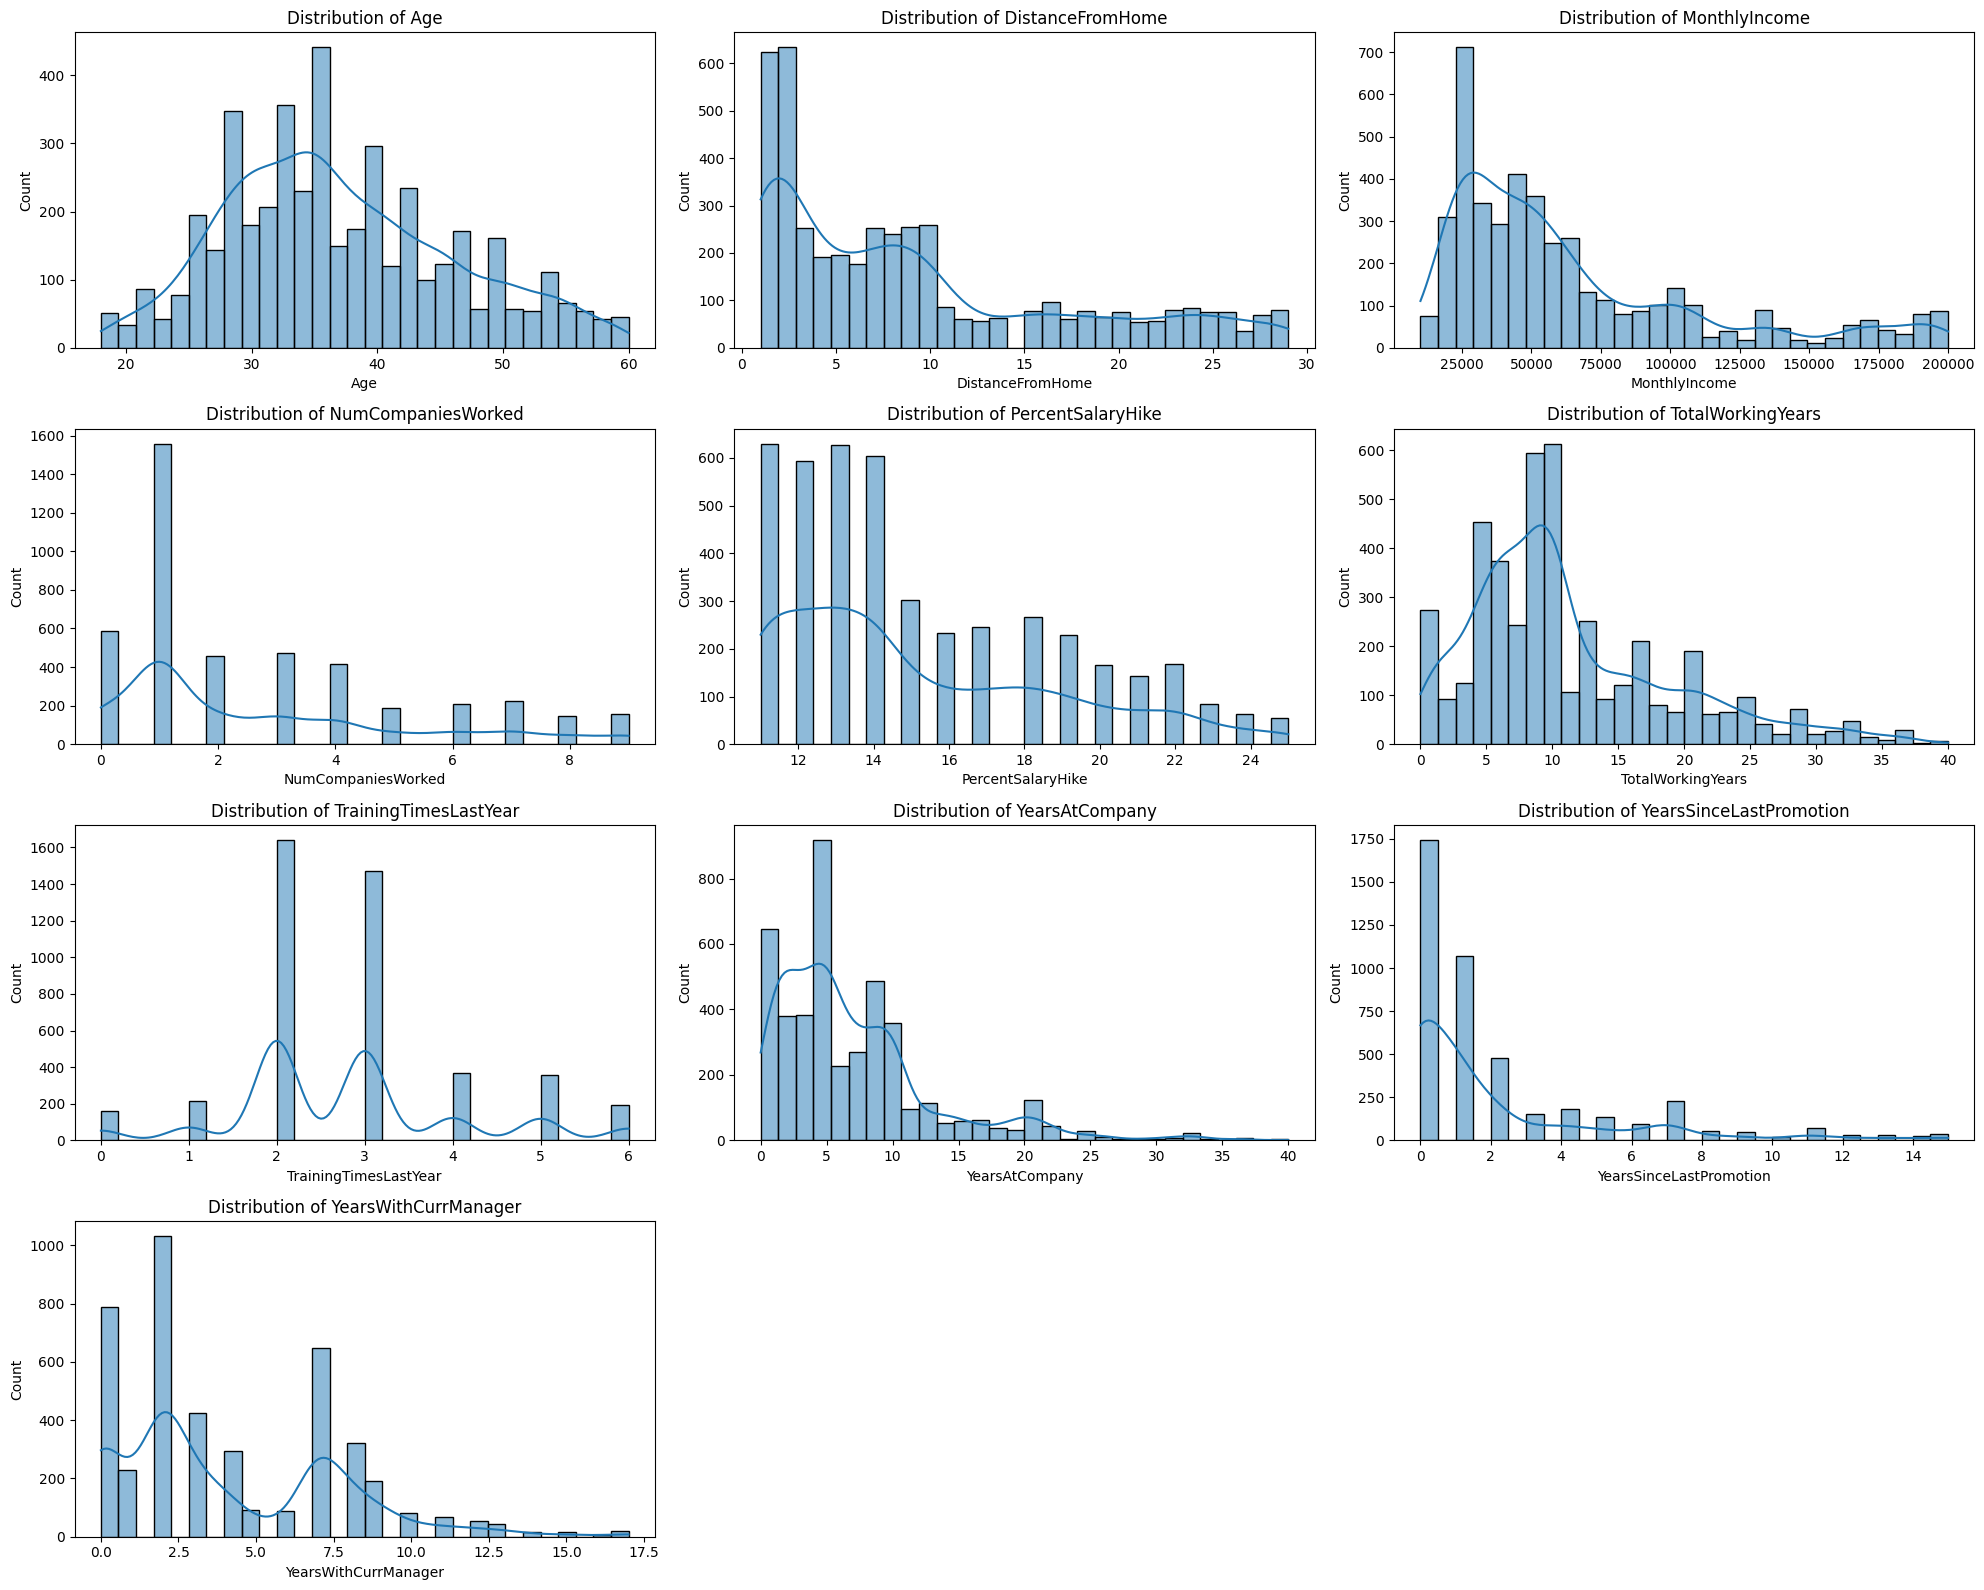

In [22]:
# Daftar fitur numerik
numeric_features = [
    'Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 
    'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 
    'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

def plot_histograms(merged_data, features):
    # Menentukan jumlah baris dan kolom
    rows, cols = 4, 3
    fig, axes = plt.subplots(rows, cols, figsize=(20, 16))  # Ukuran grid
    
    for i, feature in enumerate(features):
        row, col = divmod(i, cols)  # Menentukan posisi baris dan kolom
        ax = axes[row, col]  # Pilih subplot
        sns.histplot(merged_data[feature], kde=True, bins=30, ax=ax)  # Histogram
        ax.set_title(f"Distribution of {feature}")
    
    # Hapus subplot kosong jika fitur kurang dari ukuran grid
    for i in range(len(features), rows * cols):
        row, col = divmod(i, cols)
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.show()

# Panggil fungsi dengan merged_data
plot_histograms(merged_data, numeric_features)

# Visualisasi Fitur - Fitur Dengan BoxPlot

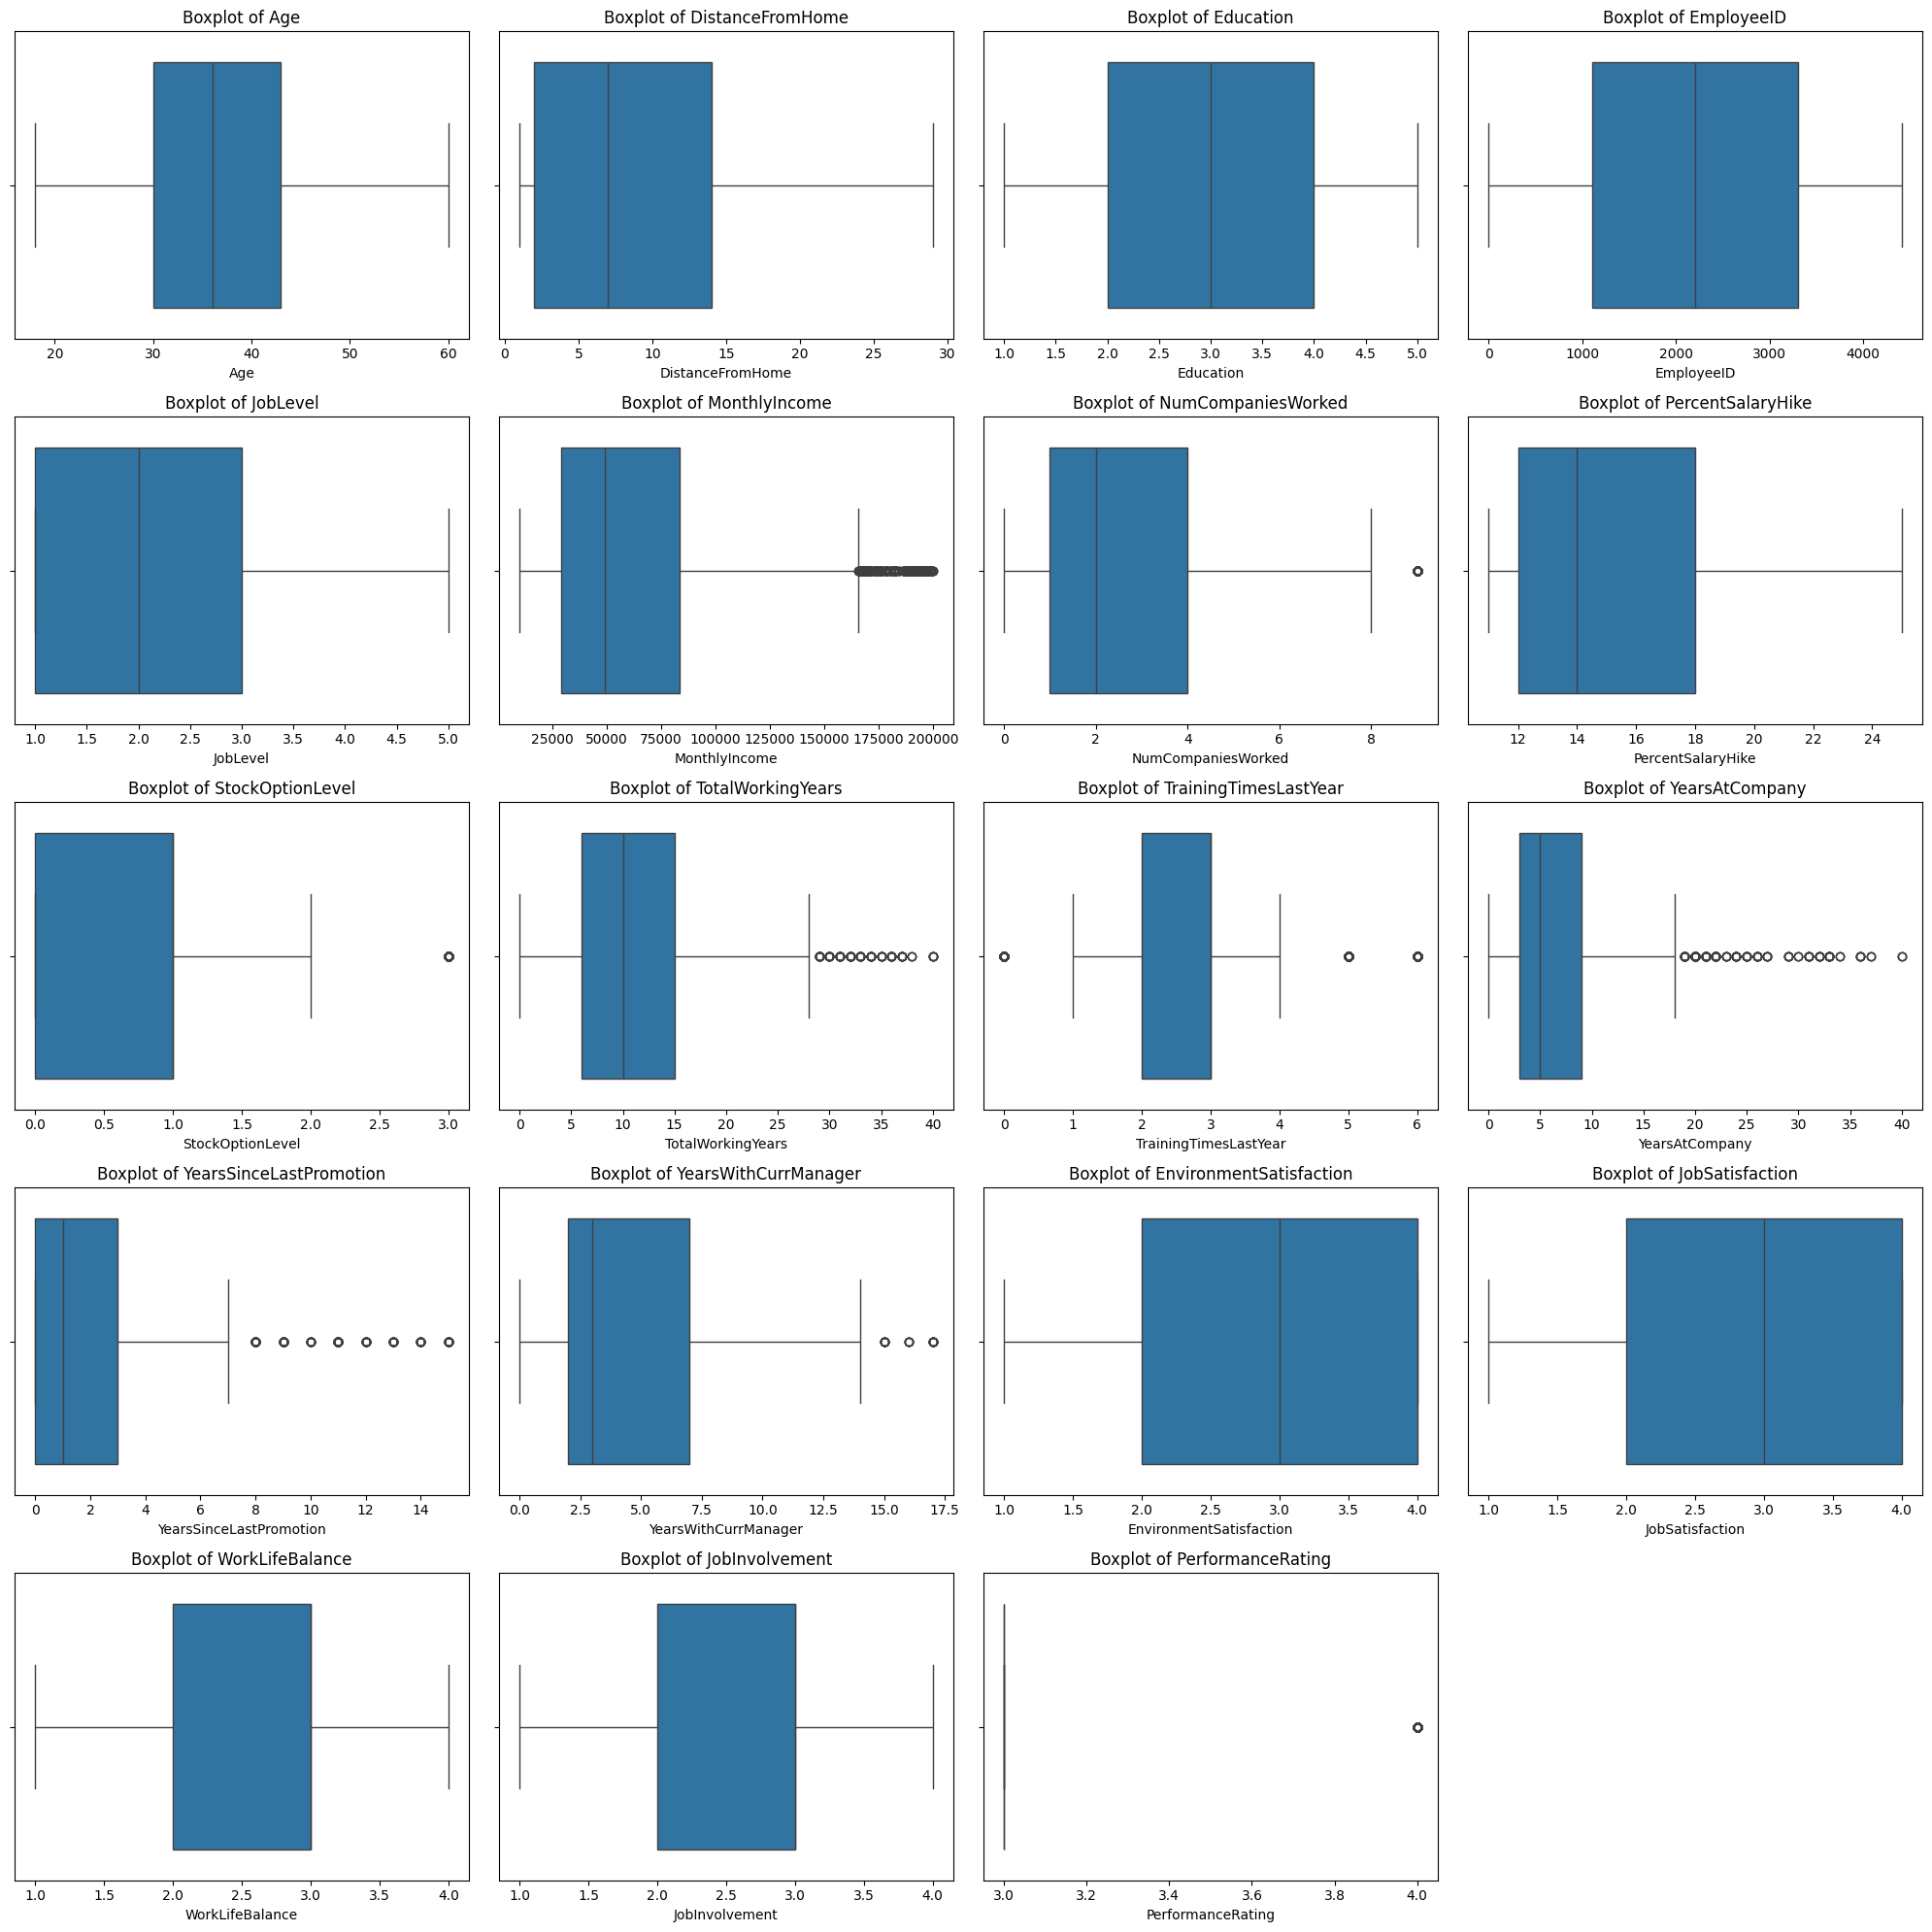

In [23]:
# Fitur yang dipilih untuk boxplot
boxplot_features = merged_data.select_dtypes(include=['int64', 'float64']).columns

def plot_boxplots(merged_data, features):
    # Menentukan jumlah baris dan kolom
    rows, cols = 5, 4
    fig, axes = plt.subplots(rows, cols, figsize=(20, 20))  # Ukuran grid
    
    for i, feature in enumerate(features):
        row, col = divmod(i, cols)  # Menentukan posisi baris dan kolom
        ax = axes[row, col]  # Pilih subplot
        sns.boxplot(data=merged_data, x=feature, ax=ax)  # Boxplot
        ax.set_title(f'Boxplot of {feature}')
    
    # Hapus subplot kosong jika fitur kurang dari ukuran grid
    for i in range(len(features), rows * cols):
        row, col = divmod(i, cols)
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.show()

# Panggil fungsi dengan merged_data
plot_boxplots(merged_data, boxplot_features)

In [24]:
numeric_features = merged_data.select_dtypes(include=[np.number])
statistics = pd.DataFrame({
    'Mean': numeric_features.mean(),
    'Median': numeric_features.median(),
    'Min': numeric_features.min(),
    'Max': numeric_features.max(),
    'Skewness': numeric_features.skew(),
    'Kurtosis': numeric_features.kurt()
})
print("Descriptive Statistics:")
print(statistics)

Descriptive Statistics:
                                 Mean   Median      Min       Max  Skewness  \
Age                         36.923810     36.0     18.0      60.0  0.413005   
DistanceFromHome             9.192517      7.0      1.0      29.0  0.957466   
Education                    2.912925      3.0      1.0       5.0 -0.289484   
EmployeeID                2205.500000   2205.5      1.0    4410.0  0.000000   
JobLevel                     2.063946      2.0      1.0       5.0  1.024703   
MonthlyIncome            65029.312925  49190.0  10090.0  199990.0  1.368884   
NumCompaniesWorked           2.691837      2.0      0.0       9.0  1.031980   
PercentSalaryHike           15.209524     14.0     11.0      25.0  0.820569   
StockOptionLevel             0.793878      1.0      0.0       3.0  0.968321   
TotalWorkingYears           11.277324     10.0      0.0      40.0  1.118879   
TrainingTimesLastYear        2.799320      3.0      0.0       6.0  0.552748   
YearsAtCompany              

In [25]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4410 non-null   float64
 14  PercentSalaryHike       

# Menangani Outlier

In [26]:
import numpy as np

# Copy of the DataFrame for safety
df_outliers = merged_data.copy()

# Function to calculate outliers using IQR
def find_outliers(data):
    Q1 = data.quantile(0.25)  # First quartile
    Q3 = data.quantile(0.75)  # Third quartile
    IQR = Q3 - Q1            # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Analyze all numeric features
numeric_features = df_outliers.select_dtypes(include=['float64', 'int64']).columns

for feature in numeric_features:
    print(f"Analyzing feature: {feature}")
    outliers = find_outliers(df_outliers[feature])
    num_outliers = len(outliers)
    total_data = len(df_outliers)
    outlier_percentage = (num_outliers / total_data) * 100
    print(f"Total outliers: {num_outliers}")
    print(f"Outlier percentage: {outlier_percentage:.2f}%")
    
    # Drop outliers if below 5%
    if outlier_percentage < 5:
        print(f"Dropping outliers for {feature}.\n")
        df_outliers = df_outliers[~df_outliers[feature].isin(outliers)]
    else:
        print(f"Keeping outliers for {feature}.\n")

merged_data = df_outliers

Analyzing feature: Age
Total outliers: 0
Outlier percentage: 0.00%
Dropping outliers for Age.

Analyzing feature: DistanceFromHome
Total outliers: 0
Outlier percentage: 0.00%
Dropping outliers for DistanceFromHome.

Analyzing feature: Education
Total outliers: 0
Outlier percentage: 0.00%
Dropping outliers for Education.

Analyzing feature: EmployeeID
Total outliers: 0
Outlier percentage: 0.00%
Dropping outliers for EmployeeID.

Analyzing feature: JobLevel
Total outliers: 0
Outlier percentage: 0.00%
Dropping outliers for JobLevel.

Analyzing feature: MonthlyIncome
Total outliers: 342
Outlier percentage: 7.76%
Keeping outliers for MonthlyIncome.

Analyzing feature: NumCompaniesWorked
Total outliers: 156
Outlier percentage: 3.54%
Dropping outliers for NumCompaniesWorked.

Analyzing feature: PercentSalaryHike
Total outliers: 0
Outlier percentage: 0.00%
Dropping outliers for PercentSalaryHike.

Analyzing feature: StockOptionLevel
Total outliers: 252
Outlier percentage: 5.92%
Keeping outlier

In [28]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4041 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4041 non-null   int64  
 1   Attrition                4041 non-null   object 
 2   BusinessTravel           4041 non-null   object 
 3   Department               4041 non-null   object 
 4   DistanceFromHome         4041 non-null   int64  
 5   Education                4041 non-null   int64  
 6   EducationField           4041 non-null   object 
 7   EmployeeID               4041 non-null   int64  
 8   Gender                   4041 non-null   object 
 9   JobLevel                 4041 non-null   int64  
 10  JobRole                  4041 non-null   object 
 11  MaritalStatus            4041 non-null   object 
 12  MonthlyIncome            4041 non-null   int64  
 13  NumCompaniesWorked       4041 non-null   float64
 14  PercentSalaryHike        4041

Terdapat total 369 data outlier yang dibuang, sehingga dari sebelumnya terdapat 4410 data menjadi 4041 data

# Transformasi Data

Mengubah fitur - fitur kategorikal menjadi numerik pada dataset gabungan

In [29]:
from sklearn.preprocessing import OneHotEncoder
categorical_features = [
    'Attrition',
    'BusinessTravel',
    'Department',
    'EducationField',
    'Gender',
    'JobRole',
    'MaritalStatus'
]

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(merged_data[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))
encoded_df.index = merged_data.index
merged_data_encoded = pd.concat([merged_data.drop(columns=categorical_features), encoded_df], axis=1)
merged_data_encoded.isna().sum()

Age                                  0
DistanceFromHome                     0
Education                            0
EmployeeID                           0
JobLevel                             0
MonthlyIncome                        0
NumCompaniesWorked                   0
PercentSalaryHike                    0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
YearsAtCompany                       0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
EnvironmentSatisfaction              0
JobSatisfaction                      0
WorkLifeBalance                      0
JobInvolvement                       0
PerformanceRating                    0
Attrition_Yes                        0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Research & Development    0
Department_Sales                     0
EducationField_Life Sciences         0
EducationField_Marketing 

# Buang Fitur EmployeeID

In [30]:
merged_data = merged_data_encoded
merged_data.drop(columns=['EmployeeID'], inplace=True)

# Informasi Dataset

In [31]:
merged_data.isna().sum()

Age                                  0
DistanceFromHome                     0
Education                            0
JobLevel                             0
MonthlyIncome                        0
NumCompaniesWorked                   0
PercentSalaryHike                    0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
YearsAtCompany                       0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
EnvironmentSatisfaction              0
JobSatisfaction                      0
WorkLifeBalance                      0
JobInvolvement                       0
PerformanceRating                    0
Attrition_Yes                        0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Research & Development    0
Department_Sales                     0
EducationField_Life Sciences         0
EducationField_Marketing             0
EducationField_Medical   

# Data Splitting

In [32]:
X = merged_data.drop(columns=['JobSatisfaction'])
y = merged_data['JobSatisfaction']

## DataSplitB : Training 80% & Test 20%

In [35]:
from sklearn.model_selection import train_test_split
X_train_DataSplitB, X_test_DataSplitB, y_train_DataSplitB, y_test_DataSplitB = train_test_split(X, y, test_size=0.2, random_state=42)
print("Jumlah data pada set train DataSplitB:", X_train_DataSplitB.shape[0])
print("Jumlah data pada set test DataSplitB:", X_test_DataSplitB.shape[0])

Jumlah data pada set train DataSplitB: 3232
Jumlah data pada set test DataSplitB: 809


# Data Standardization

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_DataSplitB_scaled = scaler.fit_transform(X_train_DataSplitB)
X_train_DataSplitB_scaled = pd.DataFrame(
    X_train_DataSplitB_scaled,
    columns=
       ['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single']
)
X_test_DataSplitB_scaled = scaler.transform(X_test_DataSplitB)
X_test_DataSplitB_scaled = pd.DataFrame(
    X_test_DataSplitB_scaled,
    columns=
       ['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single']
)

# SMOTE

In [37]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Mengubah label ke dalam array
label_kelas = np.array(y_train_DataSplitB)

# Menampilkan jumlah data kelas sebelum SMOTE
print("Jumlah Data Kelas Dari Data Training Pada DataSplitB Sebelum SMOTE:")
for i in range(1, 5):  # Iterasi untuk kelas 1 hingga 4
    print(f"Kelas {i}:", np.sum(label_kelas == i))

# Menggunakan SMOTE untuk menyeimbangkan kelas
smote = SMOTE(random_state=42)
X_DataSplitB_balanced, y_DataSplitB_balanced = smote.fit_resample(X_train_DataSplitB_scaled, y_train_DataSplitB)

# Menampilkan jumlah data kelas setelah SMOTE
print("\nJumlah Data Kelas Dari Data Training Pada DataSplitB Setelah SMOTE:")
for i in range(1, 5):  # Iterasi untuk kelas 1 hingga 4
    print(f"Kelas {i}:", np.sum(y_DataSplitB_balanced == i))

# Menampilkan jumlah data sebelum dan sesudah SMOTE
print("\nJumlah Data Dari Data Training DataSplitB Sebelum SMOTE:", len(X_train_DataSplitB_scaled))
print("Jumlah Data Dari Data Training DataSplitB Setelah SMOTE:", len(X_DataSplitB_balanced))


Jumlah Data Kelas Dari Data Training Pada DataSplitB Sebelum SMOTE:
Kelas 1: 642
Kelas 2: 614
Kelas 3: 975
Kelas 4: 1001

Jumlah Data Kelas Dari Data Training Pada DataSplitB Setelah SMOTE:
Kelas 1: 1001
Kelas 2: 1001
Kelas 3: 1001
Kelas 4: 1001

Jumlah Data Dari Data Training DataSplitB Sebelum SMOTE: 3232
Jumlah Data Dari Data Training DataSplitB Setelah SMOTE: 4004


# Model Machine Learning : Decision Tree, Random Forest, SVM Kernel Poly, KNN, XGBOOST

# Decision Tree

## Decision Tree : Training dengan Hyperparameter Tuning

In [38]:
# Import library
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Inisialisasi model
dt_model = DecisionTreeClassifier(random_state=42)

# Menentukan parameter grid untuk GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],  # Kedalaman maksimum pohon keputusan
    'min_samples_split': [2, 5, 10],      # Jumlah minimum sampel untuk membagi node
    'min_samples_leaf': [1, 2, 4],        # Jumlah minimum sampel di setiap daun
    'criterion': ['gini', 'entropy']     # Kriteria pemisahan
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Melatih model menggunakan GridSearchCV
grid_search.fit(X_DataSplitB_balanced, y_DataSplitB_balanced)

# Menampilkan parameter terbaik
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Menyimpan model terbaik
best_dt_model = grid_search.best_estimator_


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy found:  0.8793601747815231


## Decision Tree : Testing

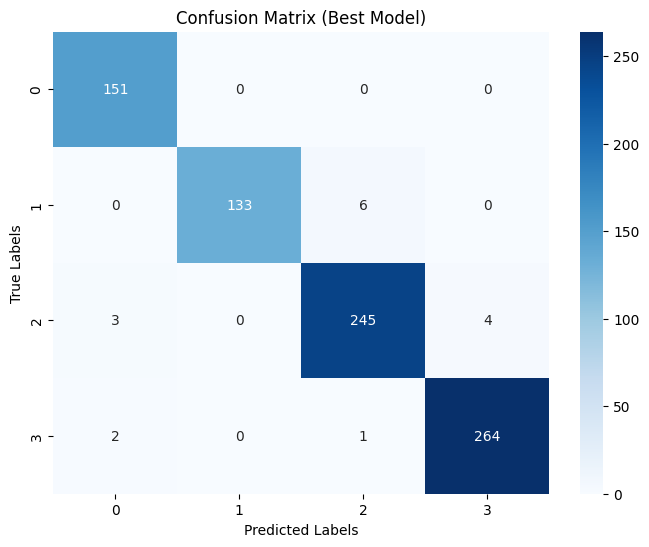

Akurasi (Best Model): 0.98
Precision (weighted, Best Model): 0.98
Recall (weighted, Best Model): 0.98
F1-score (weighted, Best Model): 0.98


In [39]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Memprediksi data testing dengan model terbaik
y_pred_best = best_dt_model.predict(X_test_DataSplitB_scaled)

# Menghitung akurasi
accuracy_best = accuracy_score(y_test_DataSplitB, y_pred_best)

# Menghitung confusion matrix
conf_matrix_best = confusion_matrix(y_test_DataSplitB, y_pred_best)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Best Model)')
plt.show()

# Menghitung metrik evaluasi dengan average='weighted' untuk multi-kelas
precision_best = precision_score(y_test_DataSplitB, y_pred_best, average='weighted')
recall_best = recall_score(y_test_DataSplitB, y_pred_best, average='weighted')
f1_best = f1_score(y_test_DataSplitB, y_pred_best, average='weighted')

# Menampilkan hasil evaluasi
print(f'Akurasi (Best Model): {accuracy_best:.2f}')
print(f'Precision (weighted, Best Model): {precision_best:.2f}')
print(f'Recall (weighted, Best Model): {recall_best:.2f}')
print(f'F1-score (weighted, Best Model): {f1_best:.2f}')


# Random Forest

## Random Forest : Training dengan Hyperparameter Tuning

In [40]:
# Import library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)

# Menentukan parameter grid untuk GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],         # Jumlah pohon dalam hutan
    'max_depth': [None, 10, 20, 30],       # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],       # Jumlah minimum sampel untuk membagi node
    'min_samples_leaf': [1, 2, 4],         # Jumlah minimum sampel di setiap daun
    'criterion': ['gini', 'entropy']       # Kriteria pemisahan
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Melatih model menggunakan GridSearchCV
grid_search.fit(X_DataSplitB_balanced, y_DataSplitB_balanced)

# Menampilkan parameter terbaik
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Menyimpan model terbaik
best_rf_model = grid_search.best_estimator_


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best accuracy found:  0.9305749063670412


## Random Forest : Testing

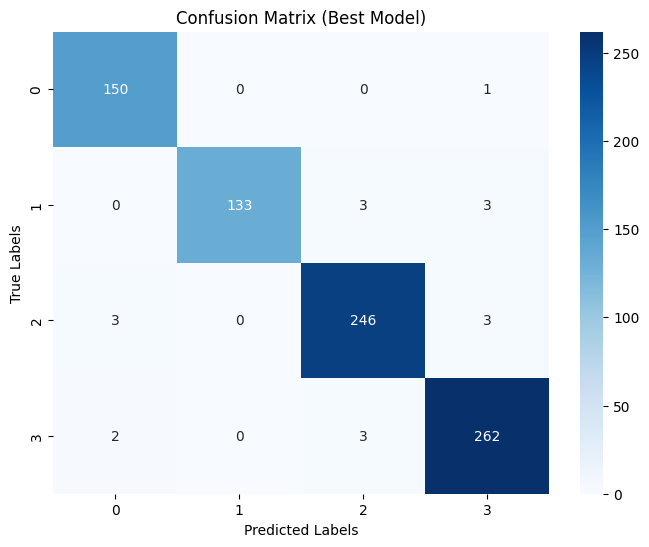

Akurasi (Best Model): 0.98
Precision (weighted, Best Model): 0.98
Recall (weighted, Best Model): 0.98
F1-score (weighted, Best Model): 0.98


In [41]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Memprediksi data testing dengan model terbaik
y_pred_best = best_rf_model.predict(X_test_DataSplitB_scaled)

# Menghitung akurasi
accuracy_best = accuracy_score(y_test_DataSplitB, y_pred_best)

# Menghitung confusion matrix
conf_matrix_best = confusion_matrix(y_test_DataSplitB, y_pred_best)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Best Model)')
plt.show()

# Menghitung metrik evaluasi dengan average='weighted' untuk multi-kelas
precision_best = precision_score(y_test_DataSplitB, y_pred_best, average='weighted')
recall_best = recall_score(y_test_DataSplitB, y_pred_best, average='weighted')
f1_best = f1_score(y_test_DataSplitB, y_pred_best, average='weighted')

# Menampilkan hasil evaluasi
print(f'Akurasi (Best Model): {accuracy_best:.2f}')
print(f'Precision (weighted, Best Model): {precision_best:.2f}')
print(f'Recall (weighted, Best Model): {recall_best:.2f}')
print(f'F1-score (weighted, Best Model): {f1_best:.2f}')

# SVM Kernel Poly

## SVM : Training dengan Hyperparameter Tuning

In [42]:
# Import library
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Inisialisasi model SVM
svm_model = SVC(random_state=42)

# Menentukan parameter grid untuk GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],                # Parameter regularisasi
    'kernel': ['poly'],               # Jenis kernel
    'degree': [3, 4],                 # Derajat polinomial (hanya untuk kernel 'poly')
    'gamma': ['scale', 'auto']        # Parameter kernel (untuk 'poly')
}

# Membuat objek GridSearchCV dengan SVM
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Melatih model menggunakan GridSearchCV
grid_search.fit(X_DataSplitB_balanced, y_DataSplitB_balanced)

# Menampilkan parameter terbaik
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Menyimpan model terbaik
best_svm_model = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:  {'C': 10, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Best accuracy found:  0.9428099250936329


## SVM : Testing

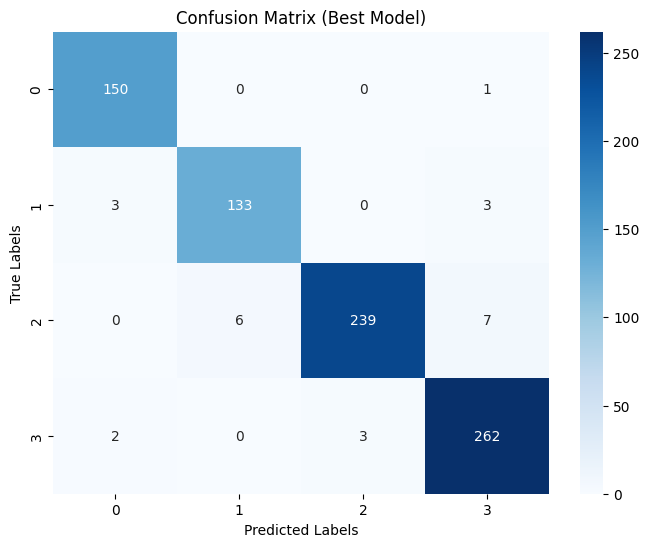

Akurasi (Best Model): 0.97
Precision (weighted, Best Model): 0.97
Recall (weighted, Best Model): 0.97
F1-score (weighted, Best Model): 0.97


In [43]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Memprediksi data testing dengan model terbaik
y_pred_best = best_svm_model.predict(X_test_DataSplitB_scaled)

# Menghitung akurasi
accuracy_best = accuracy_score(y_test_DataSplitB, y_pred_best)

# Menghitung confusion matrix
conf_matrix_best = confusion_matrix(y_test_DataSplitB, y_pred_best)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Best Model)')
plt.show()

# Menghitung metrik evaluasi dengan average='weighted' untuk multi-kelas
precision_best = precision_score(y_test_DataSplitB, y_pred_best, average='weighted')
recall_best = recall_score(y_test_DataSplitB, y_pred_best, average='weighted')
f1_best = f1_score(y_test_DataSplitB, y_pred_best, average='weighted')

# Menampilkan hasil evaluasi
print(f'Akurasi (Best Model): {accuracy_best:.2f}')
print(f'Precision (weighted, Best Model): {precision_best:.2f}')
print(f'Recall (weighted, Best Model): {recall_best:.2f}')
print(f'F1-score (weighted, Best Model): {f1_best:.2f}')

# KNN

## KNN : Training dengan Hyperparameter Tuning

In [44]:
# Import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Menyiapkan parameter untuk tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Contoh nilai untuk n_neighbors
    'weights': ['uniform', 'distance'],  # Pilihan untuk weights
    'metric': ['euclidean', 'manhattan']  # Pilihan untuk metric
}

# Membuat model KNN
knn_model = KNeighborsClassifier()

# Menyiapkan GridSearchCV dengan cross-validation 5
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Melatih model dengan GridSearchCV
grid_search.fit(X_DataSplitB_balanced, y_DataSplitB_balanced)

# Menampilkan best parameters dari GridSearchCV
print("Best Parameters: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Menyimpan model terbaik
best_knn_model = grid_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best accuracy found:  0.9355705368289637


## KNN : Testing

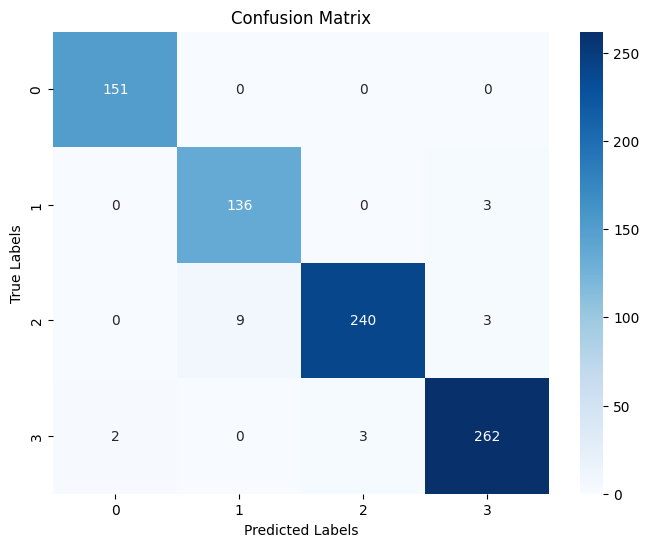

Akurasi: 0.98
Precision (weighted): 0.98
Recall (weighted): 0.98
F1-score (weighted): 0.98


In [45]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Memprediksi data testing
y_pred = best_knn_model.predict(X_test_DataSplitB_scaled)

# Menghitung akurasi
accuracy = accuracy_score(y_test_DataSplitB, y_pred)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test_DataSplitB, y_pred)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Menghitung metrik evaluasi dengan average='weighted' untuk multi-kelas
precision = precision_score(y_test_DataSplitB, y_pred, average='weighted')
recall = recall_score(y_test_DataSplitB, y_pred, average='weighted')
f1 = f1_score(y_test_DataSplitB, y_pred, average='weighted')

# Menampilkan hasil evaluasi
print(f'Akurasi: {accuracy:.2f}')
print(f'Precision (weighted): {precision:.2f}')
print(f'Recall (weighted): {recall:.2f}')
print(f'F1-score (weighted): {f1:.2f}')

# XGBOOST

## XGBOOST : Training dengan Hyperparameter Tuning

In [46]:
# Import library
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Normalisasi label target
label_encoder = LabelEncoder()
y_DataSplitB_balanced_int = label_encoder.fit_transform(y_DataSplitB_balanced)

# Menyiapkan parameter untuk tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Kedalaman pohon
    'subsample': [0.8, 1.0],  # Rasio sampel untuk training
    'colsample_bytree': [0.8, 1.0]  # Rasio fitur yang dipilih untuk setiap pohon
}

# Membuat model XGBoost
xgb_model = XGBClassifier(eval_metric='logloss')

# Menyiapkan GridSearchCV dengan cross-validation 5
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Melatih model dengan GridSearchCV
grid_search.fit(X_DataSplitB_balanced, y_DataSplitB_balanced_int)

# Menampilkan best parameters dari GridSearchCV
print("Best Parameters: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Menyimpan model terbaik
best_xgb_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best accuracy found:  0.9165842696629214


## XGBOOST : Testing

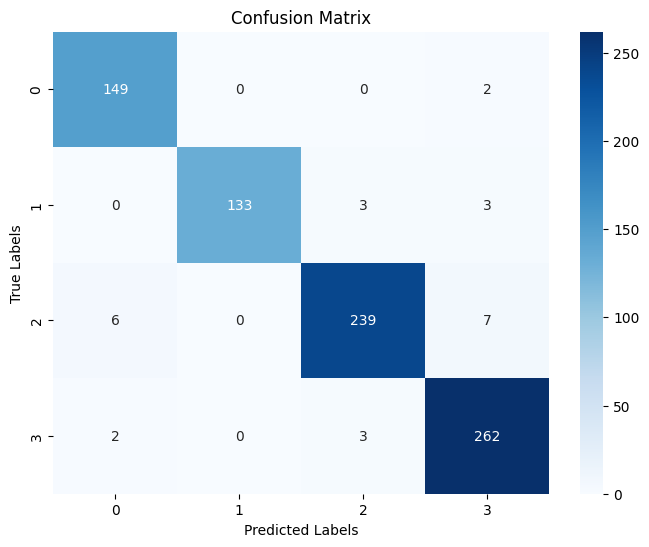

Akurasi: 0.97
Precision (weighted): 0.97
Recall (weighted): 0.97
F1-score (weighted): 0.97


In [47]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Normalisasi label target untuk data uji
y_test_DataSplitB_int = label_encoder.transform(y_test_DataSplitB)

# Memprediksi data testing
y_pred = best_xgb_model.predict(X_test_DataSplitB_scaled)

# Menghitung akurasi
accuracy = accuracy_score(y_test_DataSplitB_int, y_pred)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test_DataSplitB_int, y_pred)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Menghitung metrik evaluasi dengan average='weighted' untuk multi-kelas
precision = precision_score(y_test_DataSplitB_int, y_pred, average='weighted')
recall = recall_score(y_test_DataSplitB_int, y_pred, average='weighted')
f1 = f1_score(y_test_DataSplitB_int, y_pred, average='weighted')

# Menampilkan hasil evaluasi
print(f'Akurasi: {accuracy:.2f}')
print(f'Precision (weighted): {precision:.2f}')
print(f'Recall (weighted): {recall:.2f}')
print(f'F1-score (weighted): {f1:.2f}')

# Feature Importance Dengan Decision Tree

Feature Importance (Sorted from High to Low):
MonthlyIncome: 0.1109
Age: 0.0802
DistanceFromHome: 0.0733
TotalWorkingYears: 0.0592
PercentSalaryHike: 0.0550
YearsAtCompany: 0.0412
TrainingTimesLastYear: 0.0407
JobLevel: 0.0380
NumCompaniesWorked: 0.0376
StockOptionLevel: 0.0368
JobInvolvement: 0.0359
EnvironmentSatisfaction: 0.0347
YearsSinceLastPromotion: 0.0322
Education: 0.0292
WorkLifeBalance: 0.0283
YearsWithCurrManager: 0.0267
EducationField_Life Sciences: 0.0236
Gender_Male: 0.0210
JobRole_Research Scientist: 0.0191
MaritalStatus_Married: 0.0190
JobRole_Laboratory Technician: 0.0168
Department_Sales: 0.0137
JobRole_Manufacturing Director: 0.0136
EducationField_Technical Degree: 0.0131
EducationField_Medical: 0.0117
EducationField_Marketing: 0.0113
Attrition_Yes: 0.0105
BusinessTravel_Travel_Rarely: 0.0102
JobRole_Human Resources: 0.0094
JobRole_Sales Representative: 0.0079
JobRole_Research Director: 0.0062
Department_Research & Development: 0.0062
JobRole_Sales Executive: 0.0062

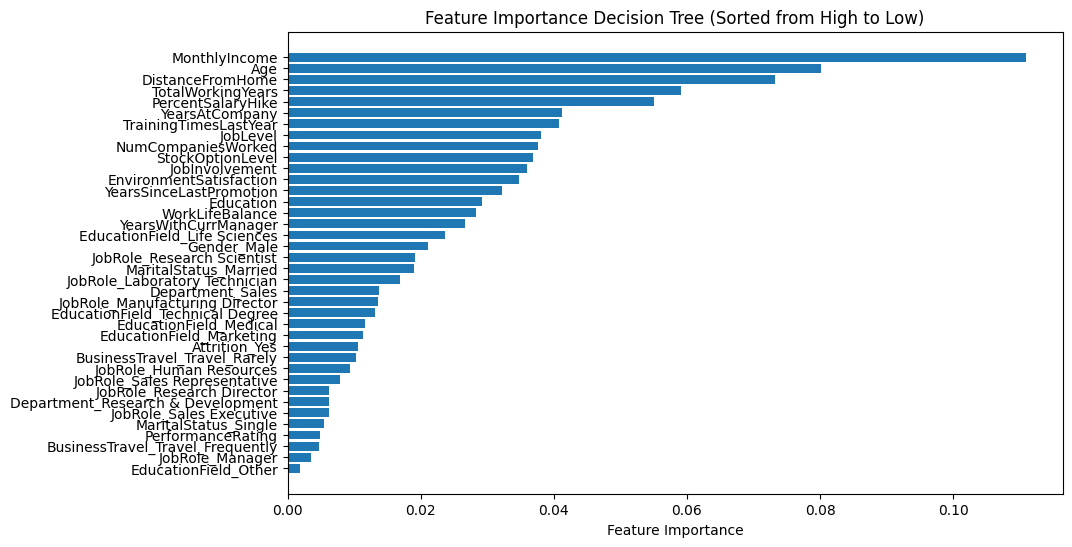

In [51]:
# Import library
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree dengan parameter yang ditentukan
dt_model = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=None, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    random_state=42
)

# Melatih model dengan data training
dt_model.fit(X_DataSplitB_balanced, y_DataSplitB_balanced)

# Menampilkan Feature Importance
feature_importance = dt_model.feature_importances_

# Mengurutkan feature importance dari yang paling penting (tertinggi)
sorted_idx = feature_importance.argsort()[::-1]  # Menggunakan [::-1] untuk membalikkan urutan

# Menampilkan nilai feature importance
print("Feature Importance (Sorted from High to Low):")
for idx in sorted_idx:
    print(f"{X_DataSplitB_balanced.columns[idx]}: {feature_importance[idx]:.4f}")

# Membuat plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(feature_importance)), X_DataSplitB_balanced.columns[sorted_idx])  # Menampilkan nama fitur sesuai urutan
plt.xlabel('Feature Importance')
plt.title('Feature Importance Decision Tree (Sorted from High to Low)')
plt.gca().invert_yaxis()  # Membalik urutan agar fitur yang paling penting ada di atas
plt.show()

# Model Decision Tree Dengan Fitur - Fitur Yang Dipilih Berdasarkan Nilai Feature Importance Dan Hyperparameter Terbaik Sebelumnya

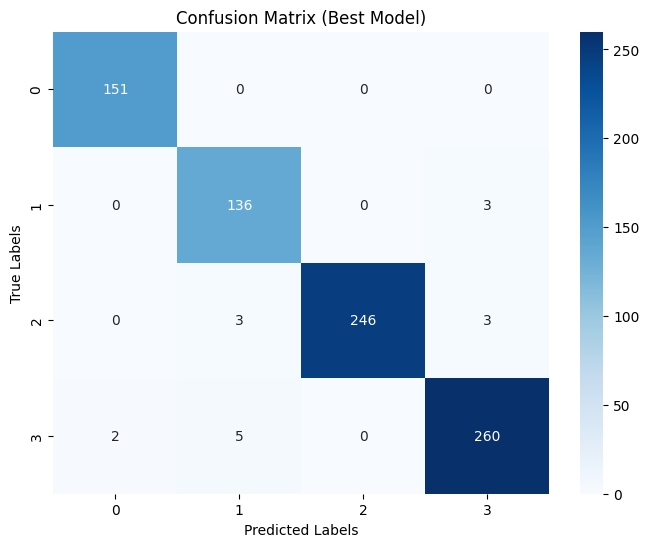

Akurasi (Best Model): 0.98
Precision (weighted, Best Model): 0.98
Recall (weighted, Best Model): 0.98
F1-score (weighted, Best Model): 0.98


In [65]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

selected_features = [
    'MonthlyIncome', 'Age', 'DistanceFromHome', 'TotalWorkingYears', 'PercentSalaryHike'
]

dt_model = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=None, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    random_state=42
)

dt_model.fit(X_DataSplitB_balanced[selected_features], y_DataSplitB_balanced)

# Memprediksi data testing dengan model terbaik
y_pred_best = dt_model.predict(X_test_DataSplitB_scaled[selected_features])

# Menghitung akurasi
accuracy_best = accuracy_score(y_test_DataSplitB, y_pred_best)

# Menghitung confusion matrix
conf_matrix_best = confusion_matrix(y_test_DataSplitB, y_pred_best)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Best Model)')
plt.show()

# Menghitung metrik evaluasi dengan average='weighted' untuk multi-kelas
precision_best = precision_score(y_test_DataSplitB, y_pred_best, average='weighted')
recall_best = recall_score(y_test_DataSplitB, y_pred_best, average='weighted')
f1_best = f1_score(y_test_DataSplitB, y_pred_best, average='weighted')

# Menampilkan hasil evaluasi
print(f'Akurasi (Best Model): {accuracy_best:.2f}')
print(f'Precision (weighted, Best Model): {precision_best:.2f}')
print(f'Recall (weighted, Best Model): {recall_best:.2f}')
print(f'F1-score (weighted, Best Model): {f1_best:.2f}')
